# Lab3 - MNIST

In [1]:
from sklearn.datasets import fetch_openml # import fetch_openml from sklearn datasets
import numpy as np
mnist = fetch_openml('mnist_784',cache=True, version=1)  #read the mnist data using fetch_openml and data is returned using http request
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
mnist # it looks like dictionary, this data is messy we need to preprocess using the below command

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [5]:
np.sqrt(784) # all the vectors mnist["data"] forms the 28 * 28 matrix which is 28 * 28 grey scale image

28.0

In [6]:
mnist['target'] #each row is a label

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
mnist.target=mnist.target.astype(np.int8) #now images are in the form on int8

In [9]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [10]:
np.unique(mnist['target'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [11]:
X, y = mnist["data"], mnist["target"]

In [12]:
y=y.astype(np.uint8) #Note that the label is a string. Most ML algorithms expect numbers, so let’s cast y to integer

In [13]:
import matplotlib 
import matplotlib.pyplot as plt

In [14]:
y[11]

5

In [15]:
digit=X[11] # extract the 426 row vector
digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [16]:
digit=digit.reshape(28,28) # digit is now 28 * 28 matrix

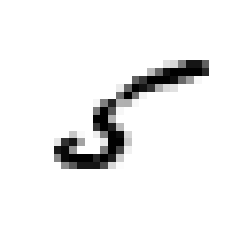

In [17]:
plt.imshow(digit,cmap=matplotlib.cm.binary) #cmap is used to remove the grey scale image
plt.axis("off")
plt.show()

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# X_train & y_train = starts from 0 till 59999 
# X_test & y_test= from 60000 till the end

In [19]:
shuffling_index=np.random.permutation(60000) 
shuffling_index # produces the random permutation of shuffle. Some learning algorithms are sensitive to the order of the training instances, and they perform poorly if
#they get many similar instances in a row. Shuffling the dataset ensures that this won’t happen

array([39494, 29818, 28869, ..., 13751, 55227, 19920])

In [20]:
X_train,y_train=X_train[shuffling_index],y_train[shuffling_index] # shuffled the training set

# Binary Classifier

In [26]:
y_train_5 = y_train==5 #target vectors for classification task to distinguish whether its 6 or not
y_test_5= y_train==5


In [27]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(max_iter=20,tol=np.infty) #variable sgd_clf is initialised Classifier object, include the maximum iteration and provide the tolerance value
sgd_clf.fit(X_train, y_train_5) #its trained with sample 6

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=20,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [23]:
sgd_clf.predict([X[11]])

array([ True])

In [29]:
y[21]

0

# Performance Measures

# Measuring Accuracy Using Cross-Validation

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5, cv=3, scoring='accuracy') 

array([0.9615 , 0.95065, 0.96495])

In [31]:
#Dumb Classifier
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [32]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9101 , 0.90905, 0.9098 ])

In [33]:
sum(y_train_5)/60000  #10% of the numbers are 5 thats why dumb classifier is doing a good job

0.09035

# Confusion Matrix

In [36]:
from sklearn.model_selection import cross_val_predict #lets train on predicted values

In [42]:
y_train_pred = sgd_clf.predict(X_train)

In [43]:
from sklearn.metrics import confusion_matrix

In [ ]:
-----------------------------

# Precision and Recall

In [44]:
from sklearn.metrics import precision_score, recall_score

In [45]:
precision_score(y_train_5, y_train_pred)

0.8908794788273615

In [46]:
4013/(4013+1337)

0.7500934579439252

In [47]:
recall_score(y_train_5, y_train_pred)

0.7063272458955913

In [48]:
4013/(4013+1408)

0.740269323003136

# F1 score

In [51]:
from sklearn.metrics import f1_score

In [50]:
f1_score(y_train_5, y_train_pred)

0.7879411462084577

# Precision/Recall trade-off

In [52]:
index=11
y_scores = sgd_clf.decision_function([X[index]])
y_scores

array([105320.56701483])

In [53]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [54]:
threshold = 200000
(y_scores > threshold)


array([False])

In [55]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([-137886.62983337, -109318.75195836,   91753.1612031 , ...,
       -437825.27584332, -243890.32175638,   19587.36902241])

In [56]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [57]:
precisions

array([0.09123191, 0.09121661, 0.09121815, ..., 1.        , 1.        ,
       1.        ])

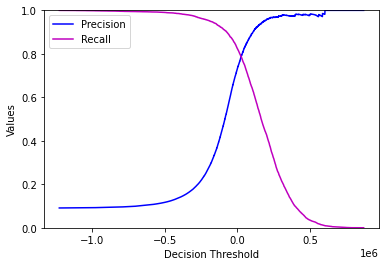

In [58]:
plt.plot(thresholds, precisions[:-1], "b-", label="Precision")
plt.plot(thresholds, recalls[:-1], "m-", label="Recall")
plt.xlabel('Decision Threshold')
plt.ylabel('Values')
plt.legend()
plt.ylim([0,1])
plt.show()

(0.0, 1.0, 0.0, 1.0)

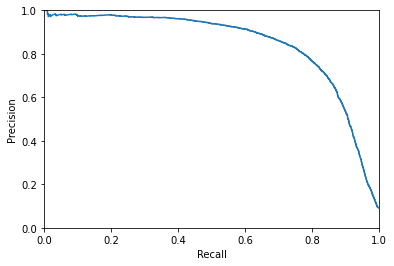

In [59]:
plt.plot(recalls,precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0,1,0,1])

In [60]:
recalls


array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [61]:
recalls>0.8

array([ True,  True,  True, ..., False, False, False])

# ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=3, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel('FPR')
    plt.ylabel('TPR')

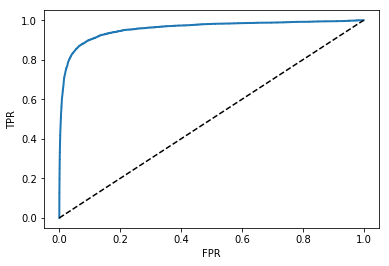

In [ ]:
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train_5, y_scores)

0.957029548637832

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")

c:\users\mahendra\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\mahendra\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\mahendra\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
y_scores_forest = y_probas_forest[:, 1] # we need scores = probabality of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

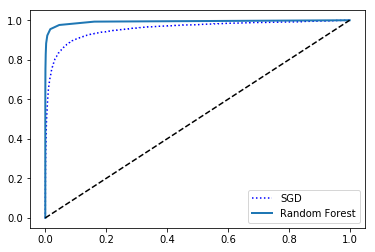

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9927238908128071